In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
 
import warnings
warnings.filterwarnings('ignore')

In [4]:
tracks = pd.read_csv('songs.csv')
tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [5]:
tracks.shape

(42305, 22)

In [6]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [7]:
#model = TSNE(n_components = 2, random_state = 0)
#a = pd.read_csv('songs.csv')
#tsne_data = model.fit_transform(a.head(500))
#plt.figure(figsize = (7, 7))
#plt.scatter(tsne_data[:,0], tsne_data[:,1])
#plt.show()

In [8]:
tracks['song_name'].nunique(), tracks.shape

(15439, (42305, 22))

Text(0.5, 1.0, 'Histogram plot')

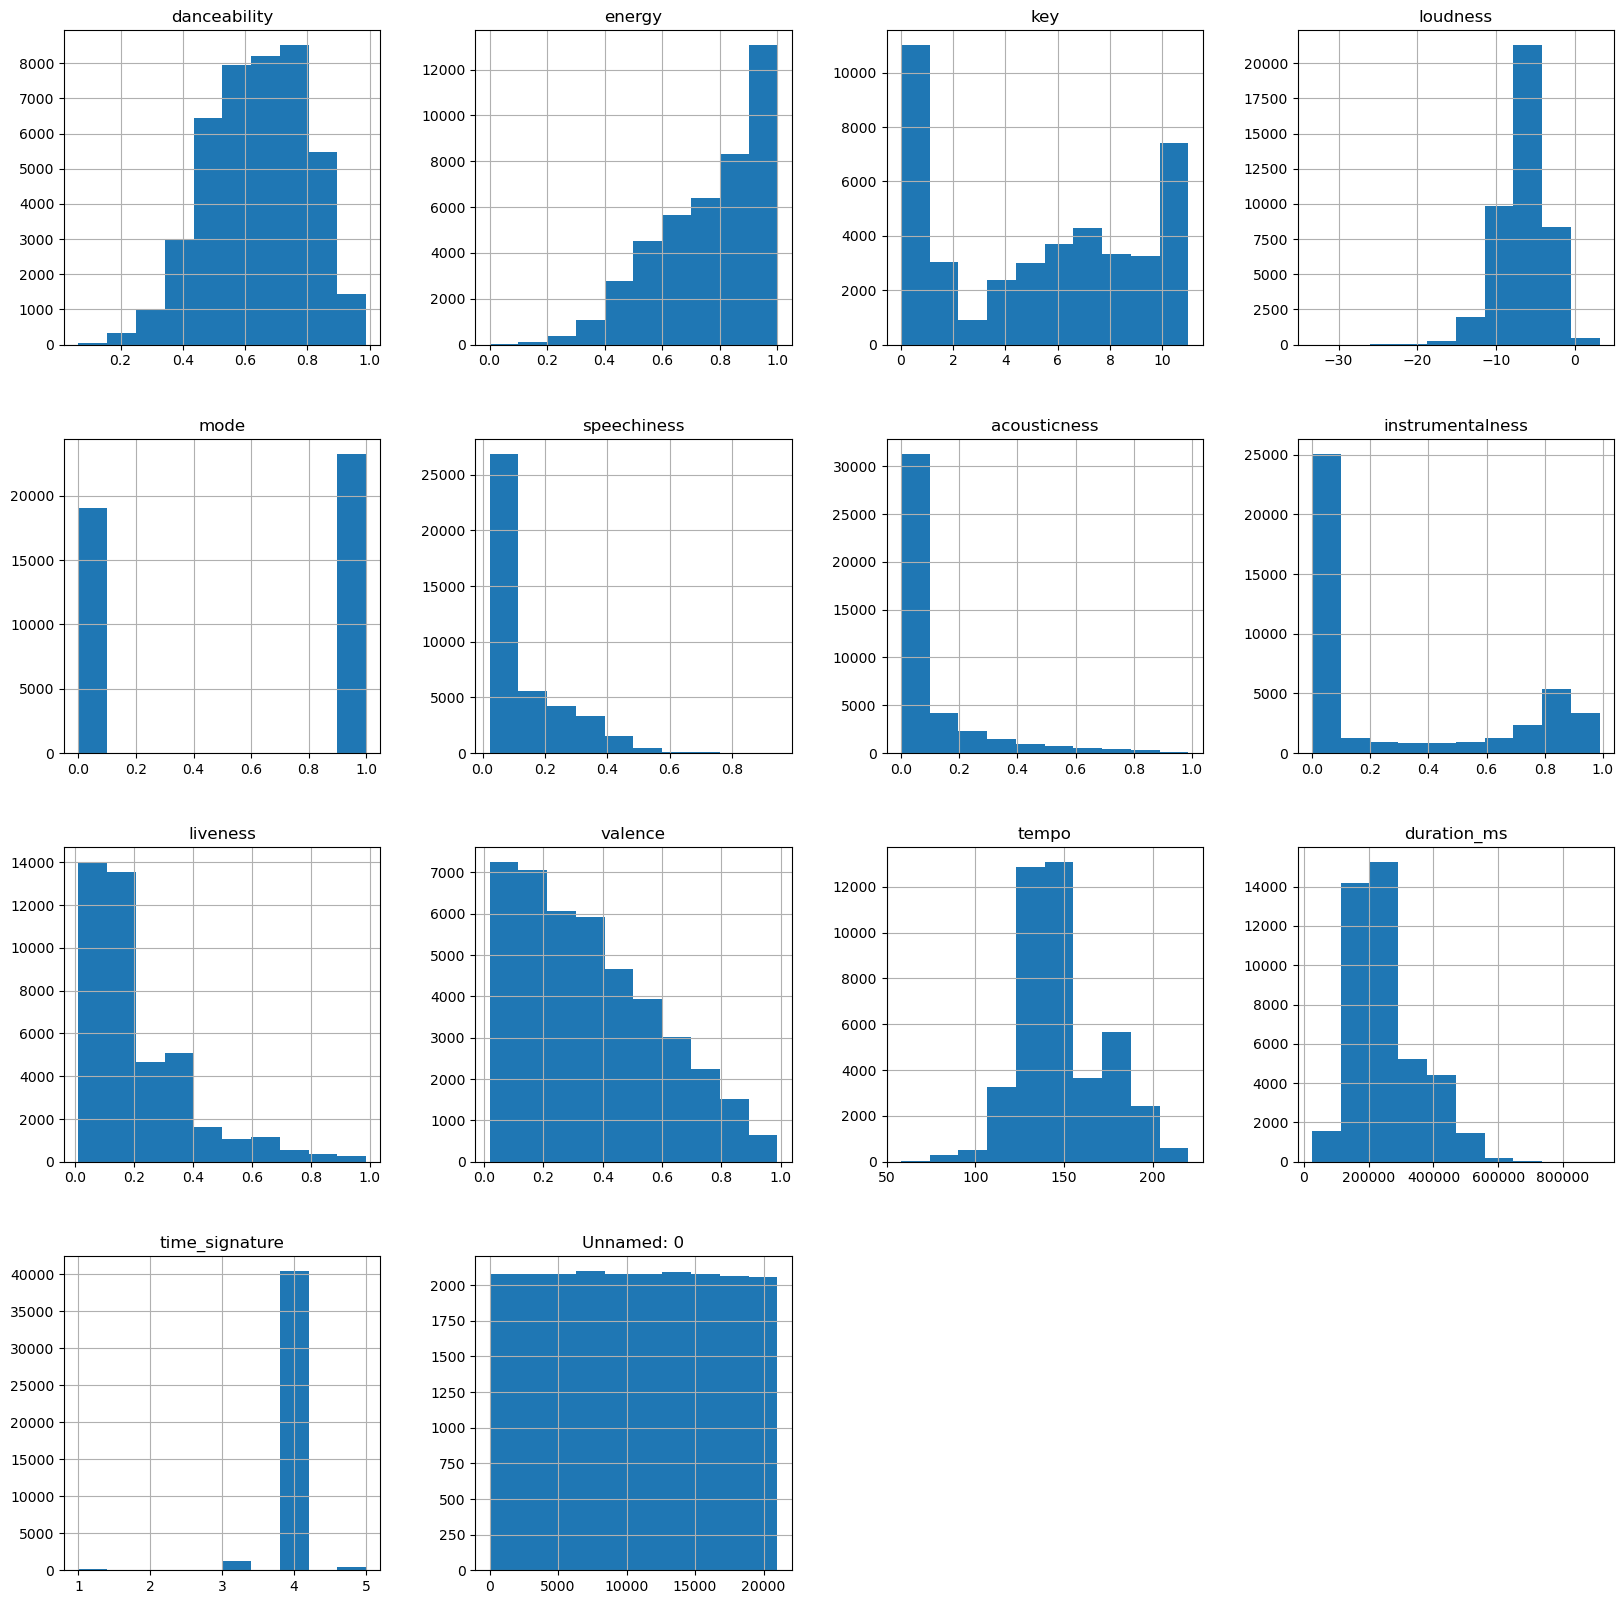

In [9]:
tracks.hist(figsize =(20,20))
plt.title("Histogram plot", size =15, weight = 'bold')

In [10]:
floats = []
for col in tracks.columns:
  if tracks[col].dtype == 'float':
    floats.append(col)
 
len(floats)

10

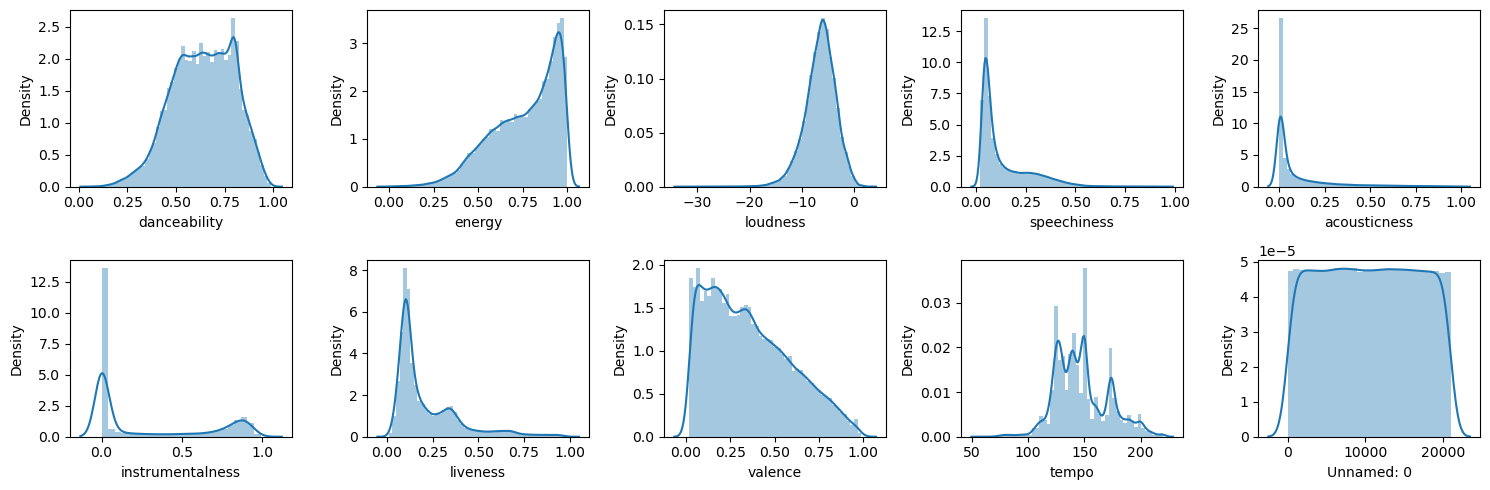

In [11]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(tracks[col])
plt.tight_layout()
plt.show()

In [12]:
def get_similarities(song_name, data):
   
  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['song_name']==song_name]['genre']).toarray()
  num_array1 = data[data['song_name']==song_name].select_dtypes(include=np.number).to_numpy()
   
  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['song_name']
     
    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['song_name']==name]['genre']).toarray()
    num_array2 = data[data['song_name']==name].select_dtypes(include=np.number).to_numpy()
 
    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)
     
  return sim

In [13]:
def recommend_songs(song_name, data=tracks):
  # Base case
  if tracks[tracks['song_name'] == song_name].shape[0] == 0:
    print('Some songs you may like:')
    for song in data.sample(n=5)['song_name'].values:
      print(song)
    return
   
  data['similarity_factor'] = get_similarities(song_name, data)
 
  data.sort_values(by=['similarity_factor','genre'],
                   ascending = [False, False],
                   inplace=True)
   
  # First song will be the input song itself as the similarity will be highest.
  display(data[['song_name']][2:7])

In [14]:
recommend_songs('Uptown Funk (ft.Bruno Mars)')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

Vanity
nan
nan
???????
Parasite


In [15]:
recommend_songs('Closer_RnB')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

nan
MINIMIZYA (feat. IDK)
Amg
nan
nan


In [16]:
recommend_songs('The_Real_Slim_Shady')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

nan
My Nigga
IWantTheSkyToBreak
nan
nan


In [17]:
recommend_songs('Gucci_Gang')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

nan
TONYA
nan
Ring Ring (with Rvssian feat. Clever)
nan


In [18]:
recommend_songs('Remember You (feat. The Weeknd')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

nan
nan
nan
1st Summer Night
nan


In [19]:
recommend_songs('PILLOWTALK_Pop')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

nan
nan
Fire Squad
nan
River of Fog
